In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

/Users/kokkok/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
IDTest = test['Id']

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dataset = train

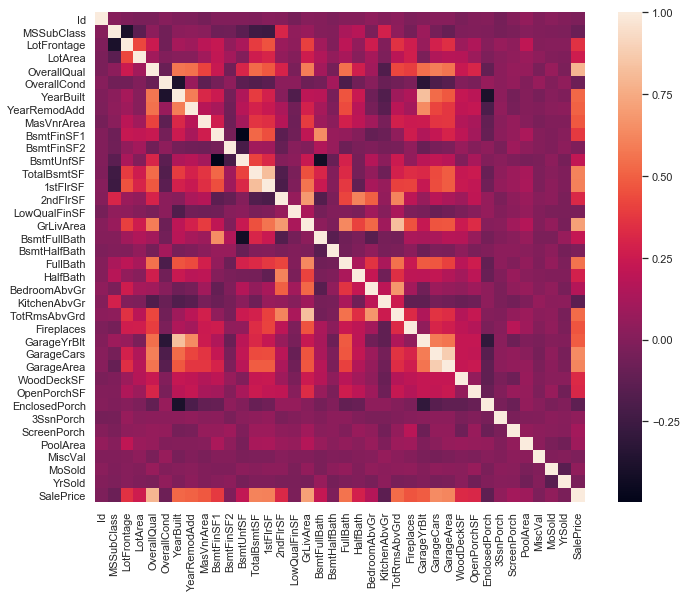

In [7]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square= True)
# g = sns.heatmap(train[['SalePrice', 'MSSubClass', 'LotArea']]
#                 .corr(), annot = True, fmt = '.2f', cmap='coolwarm')

In [ ]:
dataset.drop(labels=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'GarageYrBlt', 'GarageFinish'], axis = 1, inplace = True)
dataset.dropna(subset = ['Electrical'], inplace = True)

In [ ]:
naData = dataset.isnull().sum()
naData[naData > 0]

In [ ]:
dataset.info()

In [ ]:
def detect_outliers(df, n, features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of  indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        
        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)
    
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    
    return multiple_outliers
    
# Outliers_to_drop = detect_outliers(train, 2, [''])

In [ ]:
# dataset.loc[Outliers_to_drop]

In [ ]:
# dataset = dataset.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [ ]:
# dataset[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].head()

In [ ]:
dataset.groupby('BsmtFinType2')['Id'].count()

In [ ]:
dataset.head()

In [ ]:
index_NaN_LotFrontage = list(dataset['LotFrontage'][dataset['LotFrontage'].isnull()].index)
for index in index_NaN_LotFrontage:
    median_pred = dataset['LotFrontage'][dataset['MSZoning'] == dataset.iloc[index]['MSZoning']].median()
    if not np.isnan(median_pred):
        dataset['LotFrontage'].iloc[index] = median_pred
    else:
        dataset['LotFrontage'].iloc[index] = dataset['LotFrontage'].median()

In [ ]:
dataset['MasVnrType'].fillna(dataset['MasVnrType'].mode()[0], inplace=True)
dataset['MasVnrArea'].fillna(value = 0, inplace=True)
dataset['GarageType'].fillna(dataset['GarageType'].mode()[0], inplace=True)
dataset['GarageQual'].fillna(dataset['GarageQual'].mode()[0], inplace=True)
dataset['GarageCond'].fillna(dataset['GarageCond'].mode()[0], inplace=True)
dataset['BsmtQual'].fillna(dataset['BsmtQual'].mode()[0], inplace=True)
dataset['BsmtCond'].fillna(dataset['BsmtCond'].mode()[0], inplace=True)
dataset['BsmtExposure'].fillna(dataset['BsmtExposure'].mode()[0], inplace=True)
dataset['BsmtFinType1'].fillna(dataset['BsmtFinType1'].mode()[0], inplace=True)
dataset['BsmtFinType2'].fillna(dataset['BsmtFinType2'].mode()[0], inplace=True)
dataset['LotFrontage'].fillna(value = dataset['LotFrontage'].median(), inplace=True)

In [ ]:
g = sns.heatmap(train[['SalePrice', 'LotFrontage', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea']]
                .corr(), annot = True, fmt = '.2f', cmap='coolwarm')

In [ ]:
X = dataset[['SalePrice', 'LotFrontage', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea']]
y = dataset['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


In [ ]:
acc_logreg = round(logreg.score(X_train, y_train) * 100/2)
acc_logreg

In [ ]:
Y_pred = logreg.predict(X_test)